Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Combining the datasets

In [2]:
d_26 = pd.read_csv("2006.csv")
d_27 = pd.read_csv("2007.csv")

Getting an understanding of the dataset

In [3]:
d_26.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [4]:
d_26['Origin']

0          ATL
1          ATL
2          ATL
3          AUS
4          AUS
          ... 
7141917    ATL
7141918    SEA
7141919    ATL
7141920    SLC
7141921    CVG
Name: Origin, Length: 7141922, dtype: object

Merging the two datasets

In [5]:
flight_delay = pd.concat([d_26, d_27])

In [6]:
flight_delay

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453210,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,...,14,17,0,NaN,0,0,0,0,0,0
7453211,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,...,6,21,0,NaN,0,0,0,0,0,0
7453212,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,...,14,19,0,NaN,0,0,0,15,0,0
7453213,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,...,11,14,0,NaN,0,0,0,0,0,36


Doing the necessary datawrangling steps

In [7]:
flight_delay.insert(loc=6,column='ArrivalTime',
          value=flight_delay[['ArrTime']]/100)


In [8]:
ArrTimezone = pd.cut(flight_delay['ArrivalTime'], bins=[0.00,6.00,12.00,18.00,23.59], include_lowest=True, labels=['0','1','2','4'])

In [9]:
flight_delay['ArrTimezone'] =ArrTimezone.values

In [10]:
flight_delay['ArrTimezone']

0          1
1          2
2          4
3          4
4          1
          ..
7453210    2
7453211    4
7453212    2
7453213    2
7453214    4
Name: ArrTimezone, Length: 14595137, dtype: category
Categories (4, object): ['0' < '1' < '2' < '4']

Dropping Null values

In [11]:
flight_delay.dropna

<bound method DataFrame.dropna of          Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrivalTime  \
0        2006      1          11          3    743.0         745        10.24   
1        2006      1          11          3   1053.0        1053        13.13   
2        2006      1          11          3   1915.0        1915        21.10   
3        2006      1          11          3   1753.0        1755        19.25   
4        2006      1          11          3    824.0         832        10.15   
...       ...    ...         ...        ...      ...         ...          ...   
7453210  2007     12          15          6   1558.0        1605        17.49   
7453211  2007     12          15          6   1902.0        1851        21.10   
7453212  2007     12          15          6   1024.0        1025        17.50   
7453213  2007     12          15          6   1353.0        1315        16.58   
7453214  2007     12          15          6   1824.0        1800        20.

Finding categorical and Numerical variables in the dataset

In [12]:
numeric_features_1 = d_26.select_dtypes(include=[np.number])

numeric_features_1.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [13]:
categorical_features = d_27.select_dtypes(include=[np.object])

categorical_features.columns

C:\Users\haysh\AppData\Local\Temp\ipykernel_22964\2114755668.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = d_27.select_dtypes(include=[np.object])


Index(['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode'], dtype='object')

Identifying Outliers and Removing them

In [14]:
from collections import Counter

In [15]:
def IQR_method (df,n,features):
    
    #Takes a dataframe and returns an index list corresponding to the observations 
    #containing more than n outliers according to the Tukey IQR method.
    #
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(numeric_features_1[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(numeric_features_1[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
         # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = numeric_features_1[(numeric_features_1[column] < Q1 - outlier_step) | (numeric_features_1[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = numeric_features_1[numeric_features_1[column] < Q1 - outlier_step]
    df2 = numeric_features_1[numeric_features_1[column] > Q3 + outlier_step]
    
    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers

# detecting outliers
Outliers_IQR = IQR_method(numeric_features_1,1,numeric_features_1.columns)

# dropping outliers
flight_delay = numeric_features_1.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of outliers is: 731324


Creating the correlation matrix

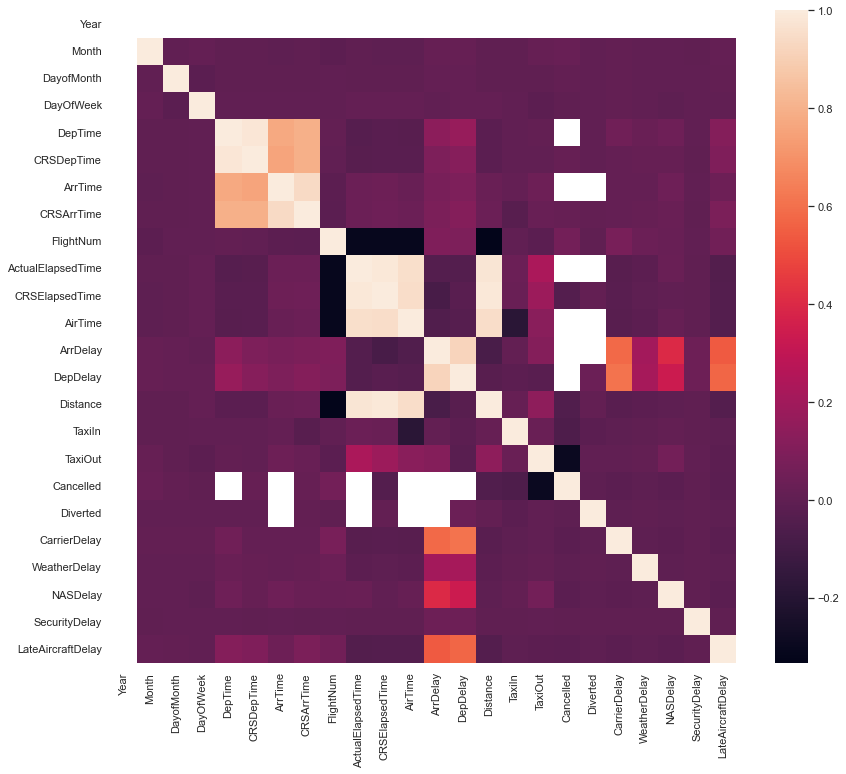

In [16]:
f , ax = plt.subplots(figsize = (14,12))
correlation_matrix= sns.heatmap(flight_delay.corr(),linecolor="black")

Taking a sample of 65000 from the dataset

In [17]:
df = flight_delay.sample(n = 65000)
df.dropna

<bound method DataFrame.dropna of          Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
4826336  2006     10           1          7   2127.0        2115   2236.0   
2335715  2006      5          23          2   1820.0        1824   2026.0   
1055524  2006      3          24          5    655.0         700    707.0   
903278   2006      2          13          1   2117.0        2125   2347.0   
3327505  2006      7          11          2   1214.0        1218   1342.0   
...       ...    ...         ...        ...      ...         ...      ...   
3295999  2006      7          18          2   1315.0        1223   1440.0   
6072901  2006     12          24          7    930.0         933   1040.0   
2753201  2006      6          12          1   1344.0        1340   1937.0   
3498071  2006      7           1          6   1213.0        1215   1409.0   
3980243  2006      8          18          5   1032.0        1035   1154.0   

         CRSArrTime  FlightNum  ActualEla

After checking the correlation matrix, getting the required variables for the model

In [18]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4826336,2006,10,1,7,2127.0,2115,2236.0,2230,1300,69.0,...,370,5,6,0,0,0,0,0,0,0
2335715,2006,5,23,2,1820.0,1824,2026.0,2038,4217,66.0,...,296,4,13,0,0,0,0,0,0,0
1055524,2006,3,24,5,655.0,700,707.0,730,571,72.0,...,402,3,9,0,0,0,0,0,0,0
903278,2006,2,13,1,2117.0,2125,2347.0,2355,445,150.0,...,956,6,12,0,0,0,0,0,0,0
3327505,2006,7,11,2,1214.0,1218,1342.0,1350,3028,88.0,...,267,10,6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295999,2006,7,18,2,1315.0,1223,1440.0,1357,4887,145.0,...,906,5,16,0,0,43,0,0,0,0
6072901,2006,12,24,7,930.0,933,1040.0,1052,435,70.0,...,366,3,14,0,0,0,0,0,0,0
2753201,2006,6,12,1,1344.0,1340,1937.0,1932,964,233.0,...,1754,7,14,0,0,0,0,0,0,0
3498071,2006,7,1,6,1213.0,1215,1409.0,1414,756,116.0,...,585,10,10,0,0,0,0,0,0,0


In [19]:
df1 = df[['Month','DayOfWeek','CRSDepTime','CRSArrTime','DepDelay','ArrDelay','CRSElapsedTime']]

In [20]:
df1.isnull().sum()

Month                0
DayOfWeek            0
CRSDepTime           0
CRSArrTime           0
DepDelay          1288
ArrDelay          1423
CRSElapsedTime       0
dtype: int64

In [21]:
df1 = df1[pd.notnull(df1['ArrDelay'])]

In [22]:
df1.isnull().sum()

Month             0
DayOfWeek         0
CRSDepTime        0
CRSArrTime        0
DepDelay          0
ArrDelay          0
CRSElapsedTime    0
dtype: int64

Dropping Null values

In [23]:
df1.dropna()

,Month,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,ArrDelay,CRSElapsedTime
4826336,10,7,2115,2230,12.0,6.0,75.0
2335715,5,2,1824,2038,-4.0,-12.0,74.0
1055524,3,5,700,730,-5.0,-23.0,90.0
903278,2,1,2125,2355,-8.0,-8.0,150.0
3327505,7,2,1218,1350,-4.0,-8.0,92.0
...,...,...,...,...,...,...,...
3295999,7,2,1223,1357,52.0,43.0,154.0
6072901,12,7,933,1052,-3.0,-12.0,79.0
2753201,6,1,1340,1932,4.0,5.0,232.0
3498071,7,6,1215,1414,-2.0,-5.0,119.0


In [24]:
df1

,Month,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,ArrDelay,CRSElapsedTime
4826336,10,7,2115,2230,12.0,6.0,75.0
2335715,5,2,1824,2038,-4.0,-12.0,74.0
1055524,3,5,700,730,-5.0,-23.0,90.0
903278,2,1,2125,2355,-8.0,-8.0,150.0
3327505,7,2,1218,1350,-4.0,-8.0,92.0
...,...,...,...,...,...,...,...
3295999,7,2,1223,1357,52.0,43.0,154.0
6072901,12,7,933,1052,-3.0,-12.0,79.0
2753201,6,1,1340,1932,4.0,5.0,232.0
3498071,7,6,1215,1414,-2.0,-5.0,119.0


Defining dependent variable and independent variables

In [25]:
X= df1[["Month", "DayOfWeek", "CRSDepTime", "CRSArrTime","DepDelay", "CRSElapsedTime"]]
y = df1['ArrDelay']

In [26]:
X

,Month,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,CRSElapsedTime
4826336,10,7,2115,2230,12.0,75.0
2335715,5,2,1824,2038,-4.0,74.0
1055524,3,5,700,730,-5.0,90.0
903278,2,1,2125,2355,-8.0,150.0
3327505,7,2,1218,1350,-4.0,92.0
...,...,...,...,...,...,...
3295999,7,2,1223,1357,52.0,154.0
6072901,12,7,933,1052,-3.0,79.0
2753201,6,1,1340,1932,4.0,232.0
3498071,7,6,1215,1414,-2.0,119.0


In [27]:
from matplotlib import pyplot
import seaborn

Plotting  boxplots

<AxesSubplot:ylabel='CRSElapsedTime'>

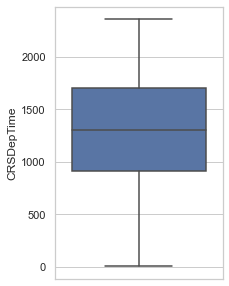

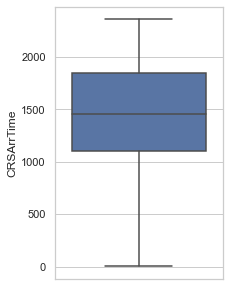

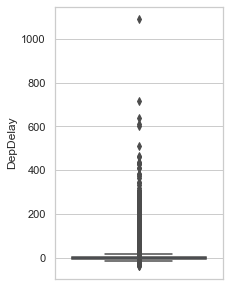

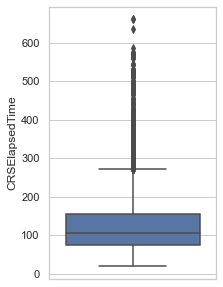

In [28]:
fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = df["CRSDepTime"] )

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = df["CRSArrTime"] )

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = df["DepDelay"] )  

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = df["CRSElapsedTime"] )

  


In [29]:
X.shape

(63577, 6)

In [30]:
y.shape

(63577,)

Splitting the sample set into train set and test set

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train

,Month,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,CRSElapsedTime
4250165,9,6,1020,1102,6.0,42.0
5738004,12,5,1925,2113,76.0,108.0
3766869,8,3,1928,2122,0.0,114.0
2395371,5,7,1833,2024,116.0,171.0
2198672,5,1,2055,2157,174.0,62.0
...,...,...,...,...,...,...
2809362,6,7,1120,1227,-1.0,127.0
677381,2,1,1755,1948,-4.0,113.0
4068375,9,1,755,1000,-4.0,65.0
4390071,9,1,1150,1335,9.0,45.0


Standardizing the variables in order to minimise biases such as biases due to different scales used for different variables

In [34]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train)
#X_train_scaled =std_scaler.fit_transform(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [35]:
X_train_scaled

array([[ 0.72492997,  1.02023226, -0.6188684 , -0.77139338,  0.06139236,
        -1.21609318],
       [ 1.60523421,  0.52017894,  1.3421499 ,  1.35729615,  2.98049151,
        -0.23168869],
       [ 0.43149522, -0.4799277 ,  1.34865051,  1.3762459 , -0.18881614,
        -0.14219737],
       ...,
       [ 0.72492997, -1.48003435, -1.19308923, -0.98615731, -0.3556218 ,
        -0.87304313],
       [ 0.72492997, -1.48003435, -0.33717516, -0.28080519,  0.18649661,
        -1.17134752],
       [-0.44880903, -1.48003435,  0.97378182,  0.75932599, -0.23051755,
        -0.44050176]])

In [36]:
#casting the scaled data to a dataframe
X_train = pd.DataFrame(data=X_train_scaled,columns=X.columns)
X_test = pd.DataFrame(data=X_test_scaled,columns=X.columns)

In [37]:
from sklearn import datasets, metrics, linear_model
from sklearn.metrics import accuracy_score

Fitting the model

In [38]:
model = linear_model.LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Finding the coefficients

In [39]:
model.coef_

array([ 1.58866103e-02, -1.87897595e-01, -2.80103605e-01, -1.66093776e-01,
        2.28736814e+01, -1.51349579e+00])

Getting the model intercept

In [40]:
model.intercept_

0.6813865240557605

In [41]:
y_pred = model.predict(X_test)

C:\Users\haysh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [42]:
from sklearn import datasets, metrics, linear_model

Finding results

In [43]:

print("RMSE: {}".format(np.sqrt(metrics.mean_absolute_error(y_test, y_pred))))#lower the better

RMSE: 2.6676013857690317


In [44]:
r2 = metrics.r2_score(y_test, y_pred)
print("R squared: ", round(r2,3))

R squared:  0.876


In [45]:
coeffecients = pd.DataFrame(model.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Month,0.015887
DayOfWeek,-0.187898
CRSDepTime,-0.280104
CRSArrTime,-0.166094
DepDelay,22.873681
CRSElapsedTime,-1.513496


Predicting values for y

In [46]:
y_pred = model.predict(X_test)

C:\Users\haysh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


C:\Users\haysh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ArrDelay', ylabel='Density'>

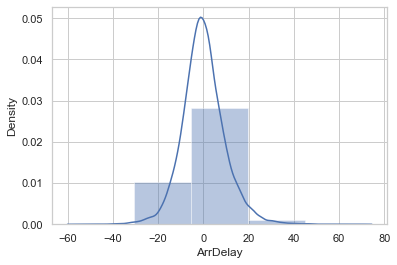

In [47]:
sns.distplot(y_test - y_pred,bins=5)

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [49]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(X_train,y_train)
Rf_train_pred = Rf.predict(X_train)
Rf_test_pred = Rf.predict(X_test)

C:\Users\haysh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [50]:
r2 = metrics.r2_score(y_test, y_pred)

In [51]:
def evaluation(model):
    modelA.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R squared: ", round(r2,3))
    print("RMSE: {}".format(np.sqrt(metrics.mean_absolute_error(y_test, y_pred))))

In [52]:
modelA = Rf
evaluation(Rf)

C:\Users\haysh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


R squared:  0.876
RMSE: 2.741624059123175


In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=50)

In [55]:
def evaluation(model):
    modelA.fit(X_train, y_train)
    y_pred = dtm.predict(X_test)
    print("R squared: ", round(r2,3))
    print("RMSE: {}".format(np.sqrt(metrics.mean_absolute_error(y_test, y_pred))))

In [56]:
modelA = dtm
evaluation(dtm)

R squared:  0.876
RMSE: 2.72188776683963
